# Import Important Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Load the data

In [2]:
ftr=pd.read_excel("Train_data.xlsx")
fte=pd.read_excel("Test_data.xlsx")

In [3]:
ftr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
fte.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
ftr.shape

(10683, 11)

Train Dataset consists of 10683 rows and 11 columns.

In [6]:
fte.shape

(2671, 10)

Test Dataset consists of 2671 rows and 10 columns.

In [7]:
ftr.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
fte.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [9]:
ftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
fte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [11]:
ftr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Two columns have null values.

In [12]:
fte.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no null values present in test dataset.

In [13]:
ftr.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
fte.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [15]:
ftr.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [16]:
fte.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

# Univariate Analysis

min price : 1759
max price: 79512


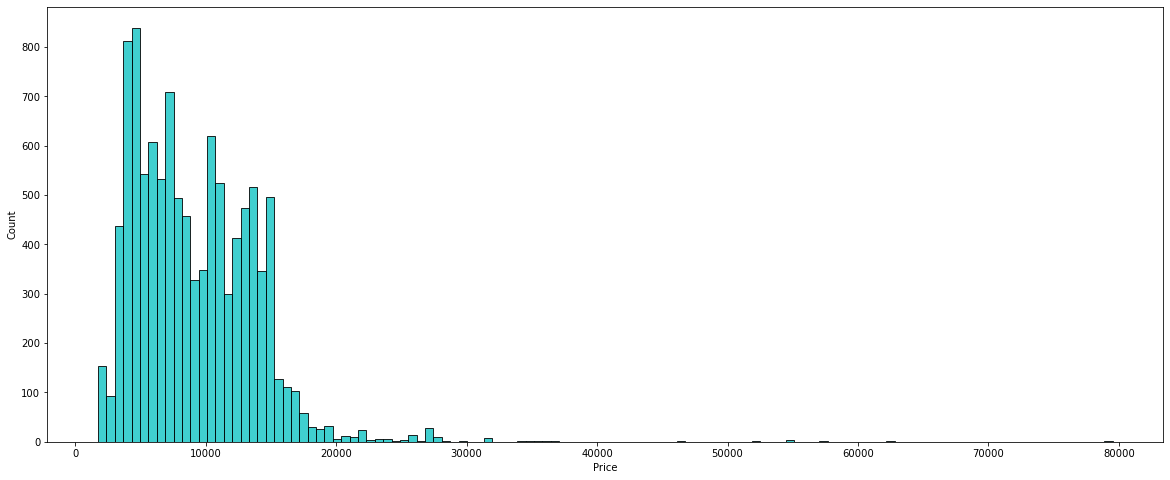

In [17]:
print('min price :',ftr['Price'].min())
print('max price:',ftr['Price'].max())
plt.figure(figsize=(20,8))
sns.histplot(ftr['Price'],color='c')
plt.show()

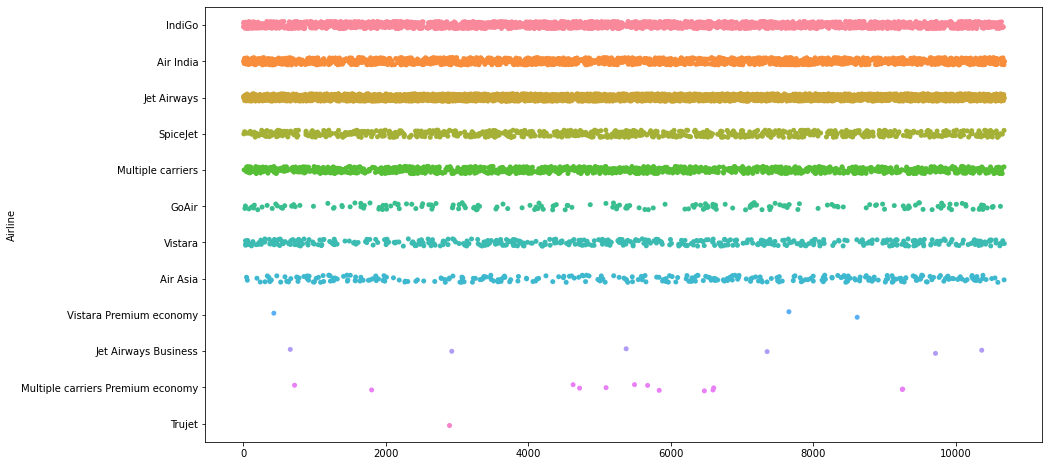

In [18]:
plt.figure(figsize=(15,8))
sns.stripplot(ftr.index,ftr['Airline'])
plt.show()

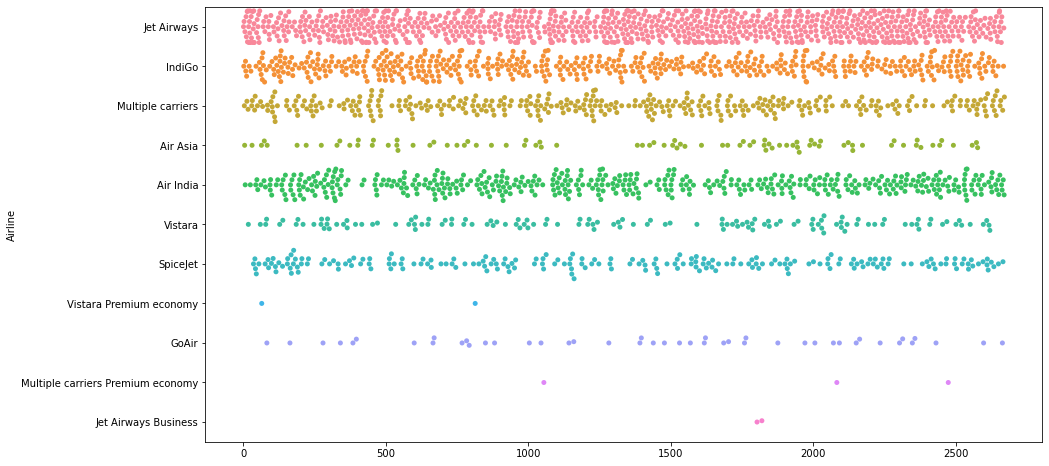

In [19]:
plt.figure(figsize=(15,8))
sns.swarmplot(fte.index,fte['Airline'])
plt.show()

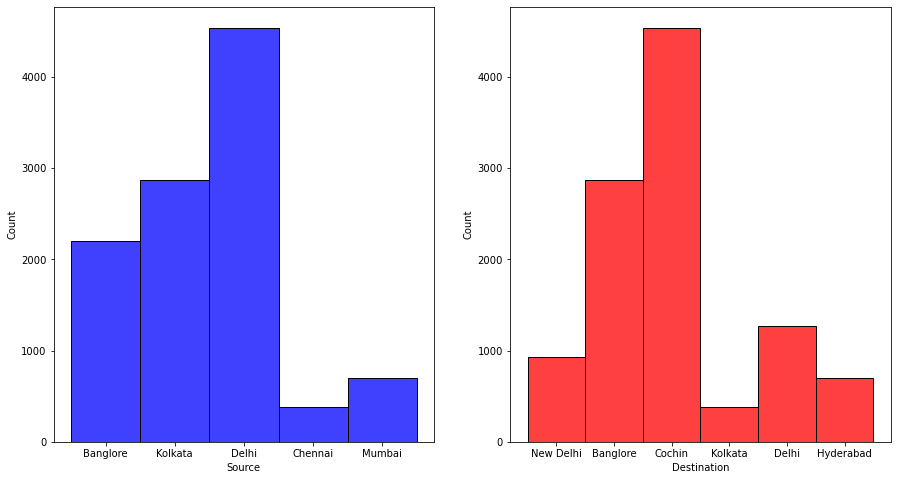

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(ftr['Source'],color='blue')

plt.subplot(1,2,2)
sns.histplot(ftr['Destination'],color='red')
plt.show()


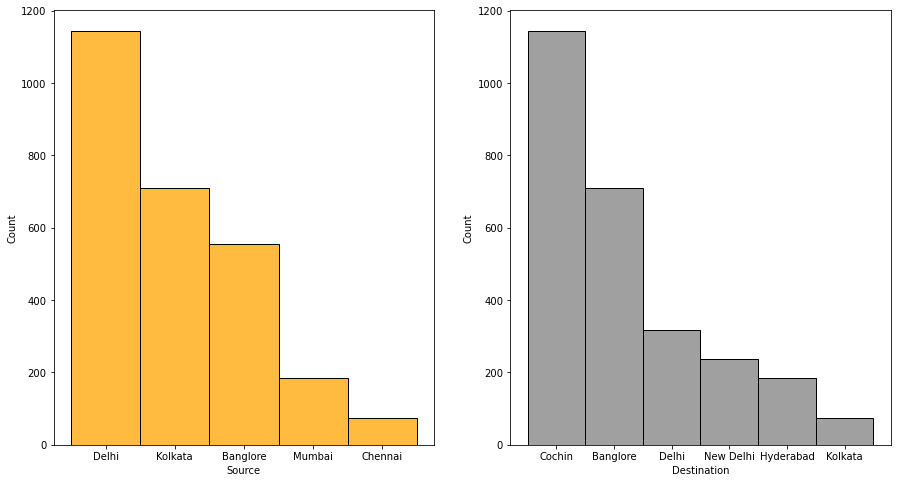

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(fte['Source'],color='orange')

plt.subplot(1,2,2)
sns.histplot(fte['Destination'],color='grey')
plt.show()


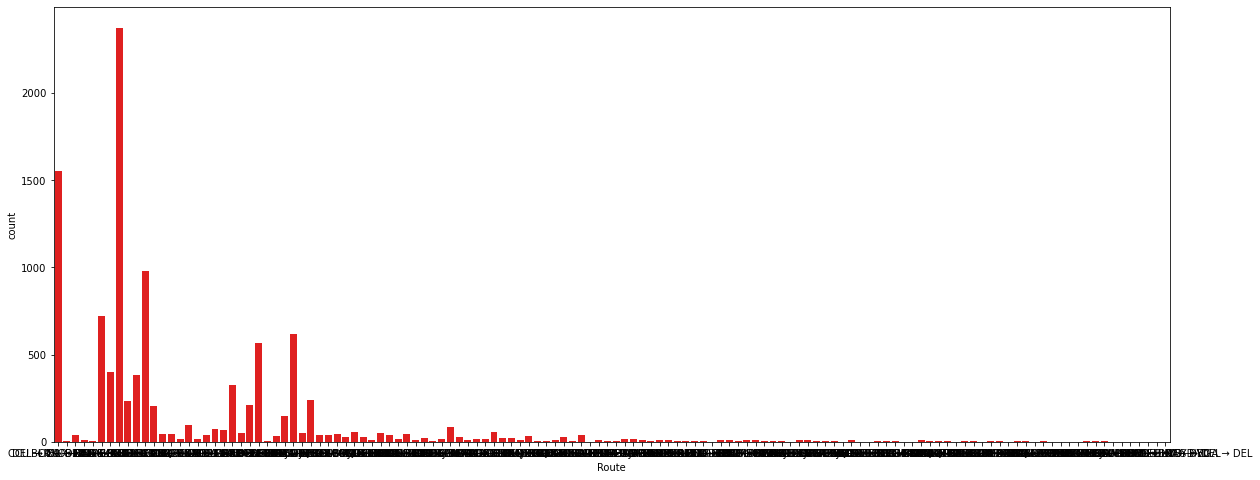

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXB → DEL → BLR             1
BOM → VNS → DEL → HYD             1
BOM → RPR → VTZ → HYD             1
CCU → IXA → BLR                   1
BLR → HBX → BOM → BHO → DEL       1
Name: Route, Length: 128, dtype: int64

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(ftr['Route'],color='red')
plt.show()
ftr["Route"].value_counts()

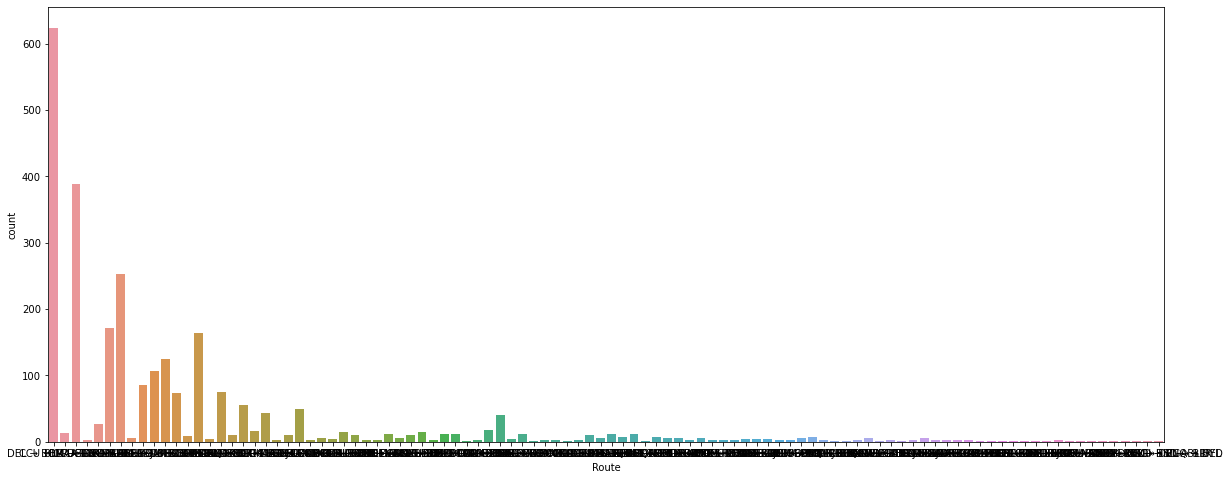

DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR                            172
BOM → HYD                            164
                                    ... 
BOM → IXC → DEL → HYD                  1
CCU → BOM → TRV → BLR                  1
BOM → GOI → HYD                        1
BLR → CCU → BBI → HYD → VGA → DEL      1
BLR → VGA → VTZ → DEL                  1
Name: Route, Length: 100, dtype: int64

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(fte['Route'])
plt.show()
fte["Route"].value_counts()

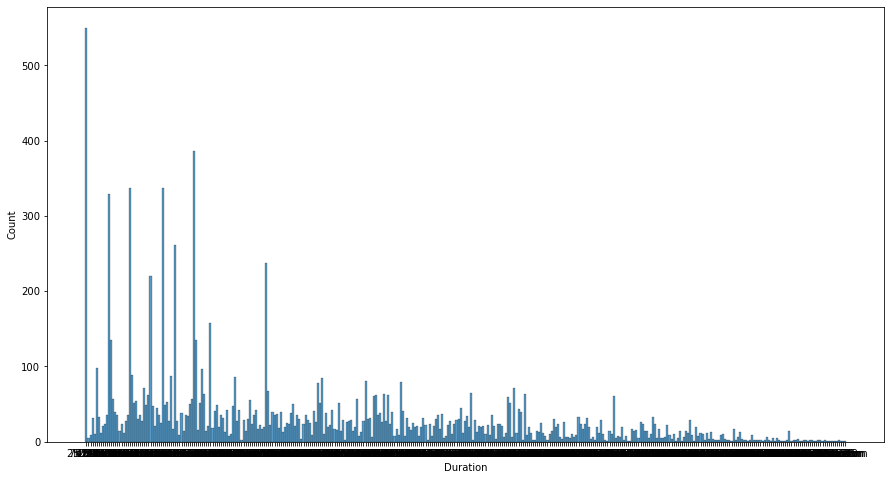

In [24]:
plt.figure(figsize=(15,8))
sns.histplot(ftr['Duration'])
plt.show()

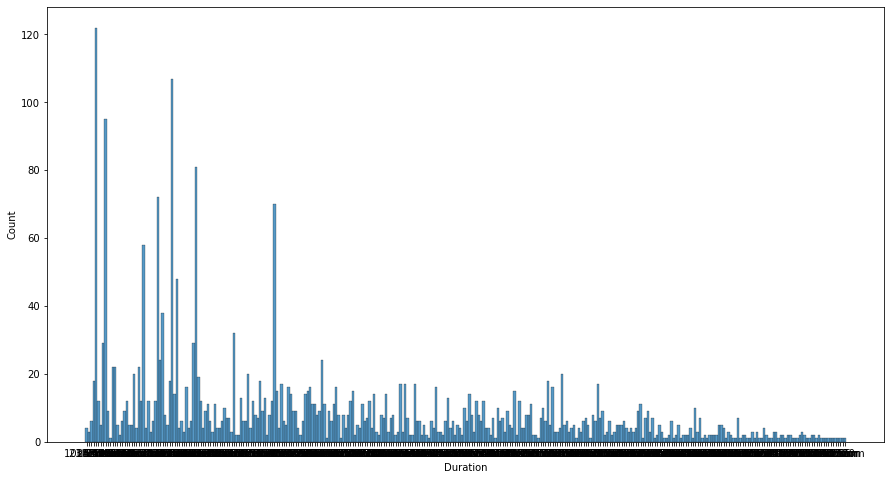

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(fte['Duration'])
plt.show()

# Bivariate Analysis:

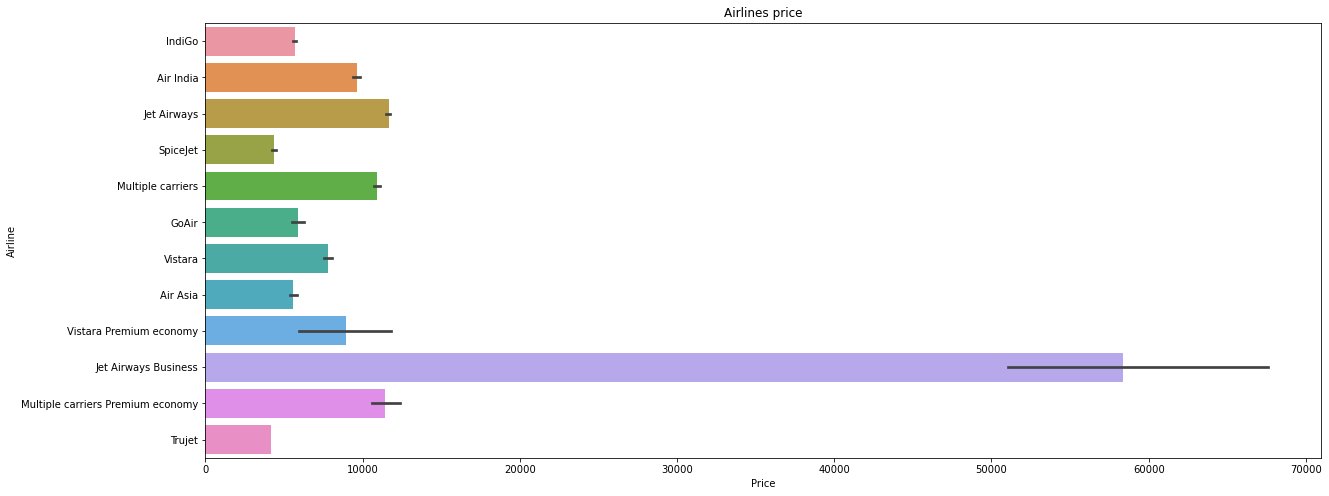

In [26]:
plt.figure(figsize=(20,8))
plt.title("Airlines price")
sns.barplot(x="Price" , y = "Airline", data=ftr)
plt.show()

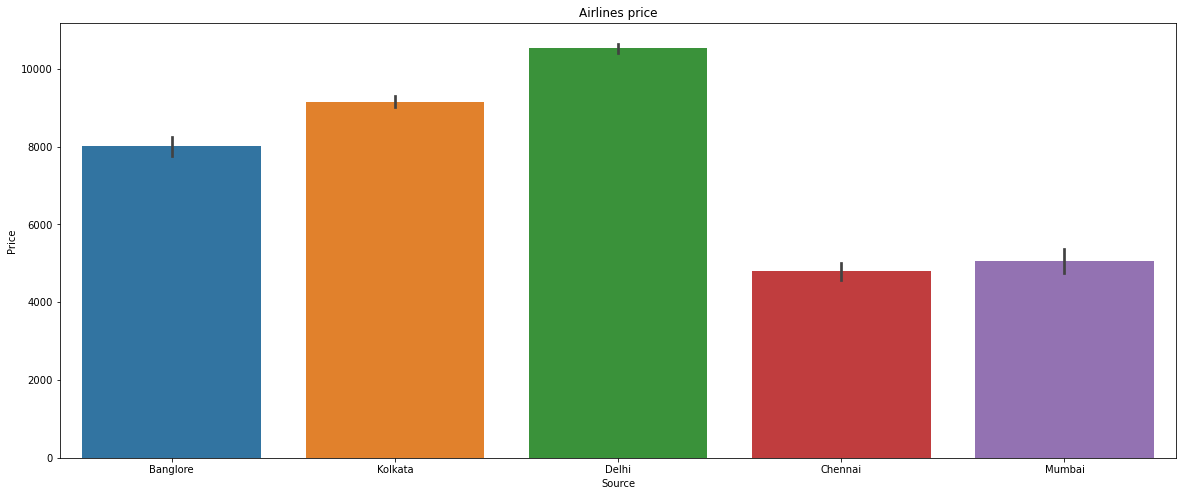

In [27]:
plt.figure(figsize=(20,8))
plt.title("Airlines price")
sns.barplot(x="Source" , y = "Price", data=ftr)
plt.show()

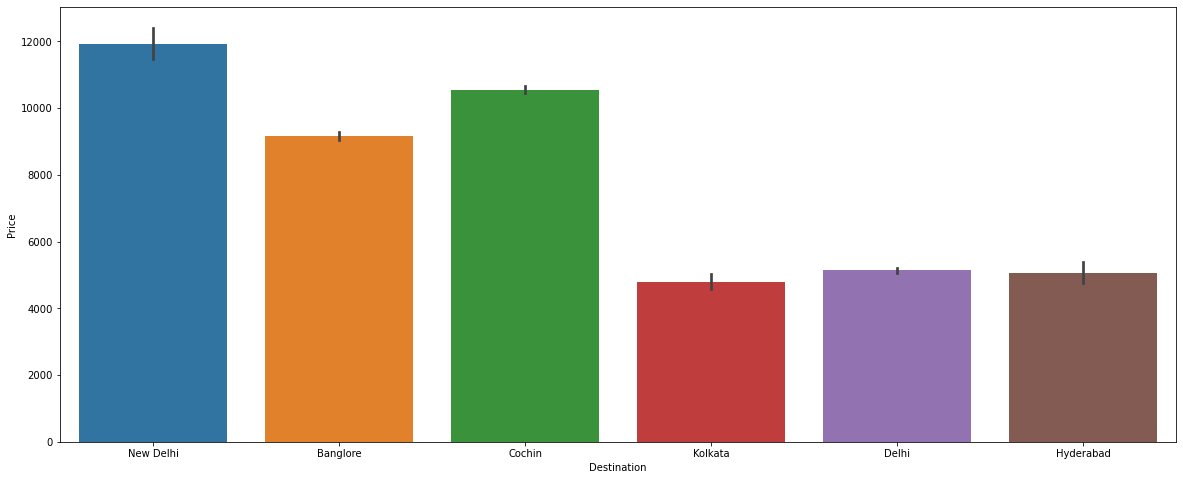

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(x="Destination" , y = "Price", data=ftr)
plt.show()
ftr['Destination'].value_counts()

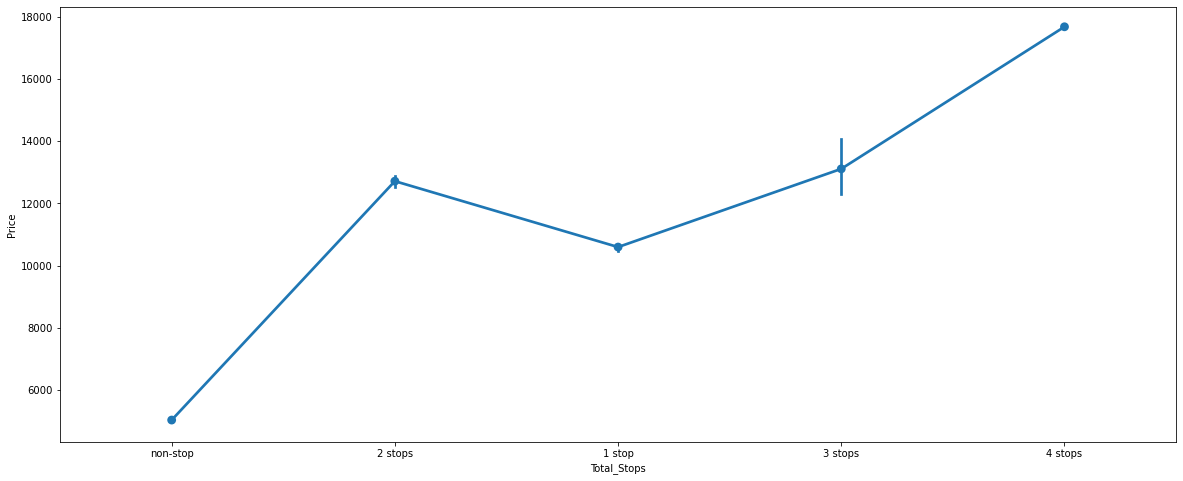

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
plt.figure(figsize=(20,8))
sns.pointplot(x="Total_Stops" , y = "Price", data=ftr)
plt.show()
ftr['Total_Stops'].value_counts()

# Multivariate Analysis:

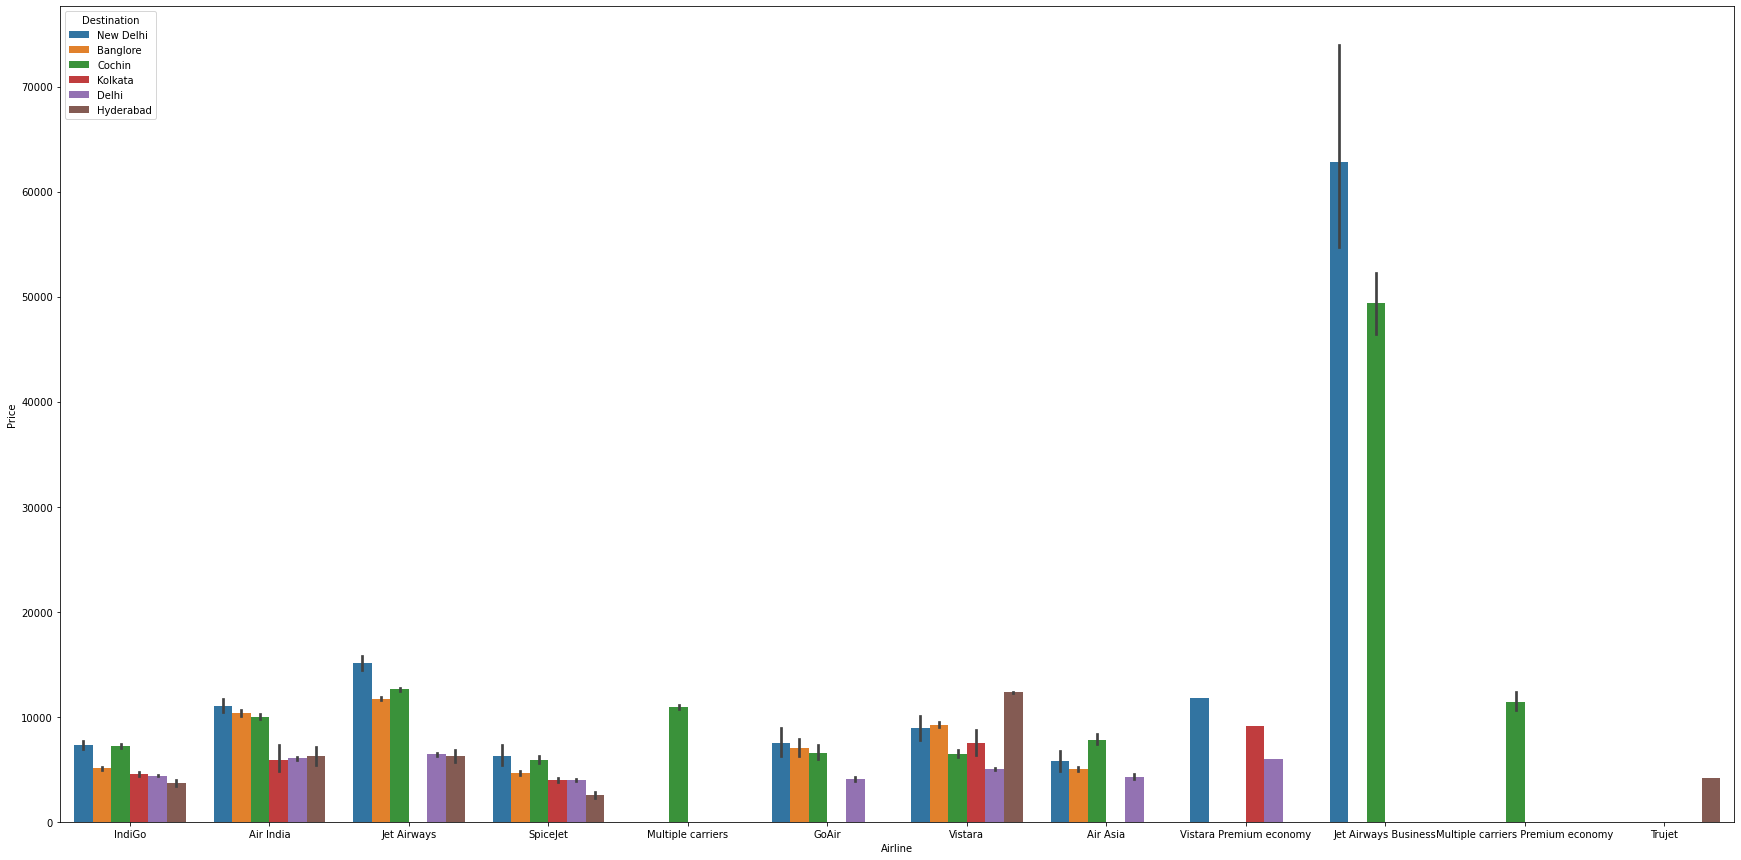

In [30]:
plt.figure(figsize=(30,15))
sns.barplot(x="Airline" , y = "Price", hue='Destination',data=ftr)
plt.show()

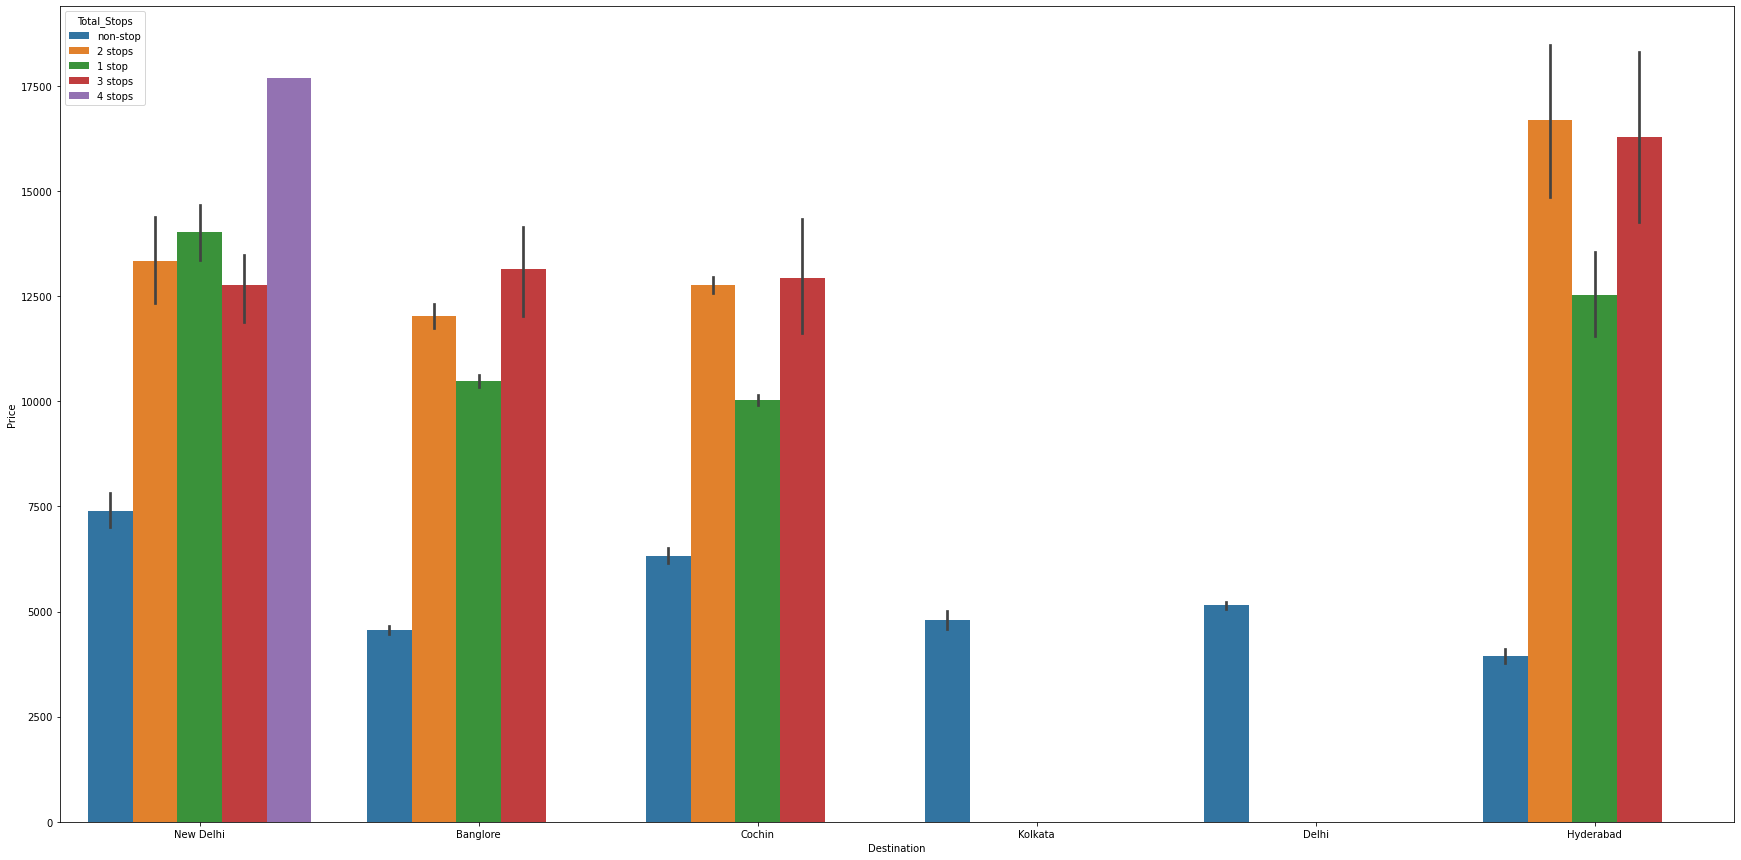

In [99]:
# plt.figure(figsize=(30,15))
# sns.barplot(x="Destination" , y = "Price", hue='Total_Stops',data=ftr)
# plt.show()

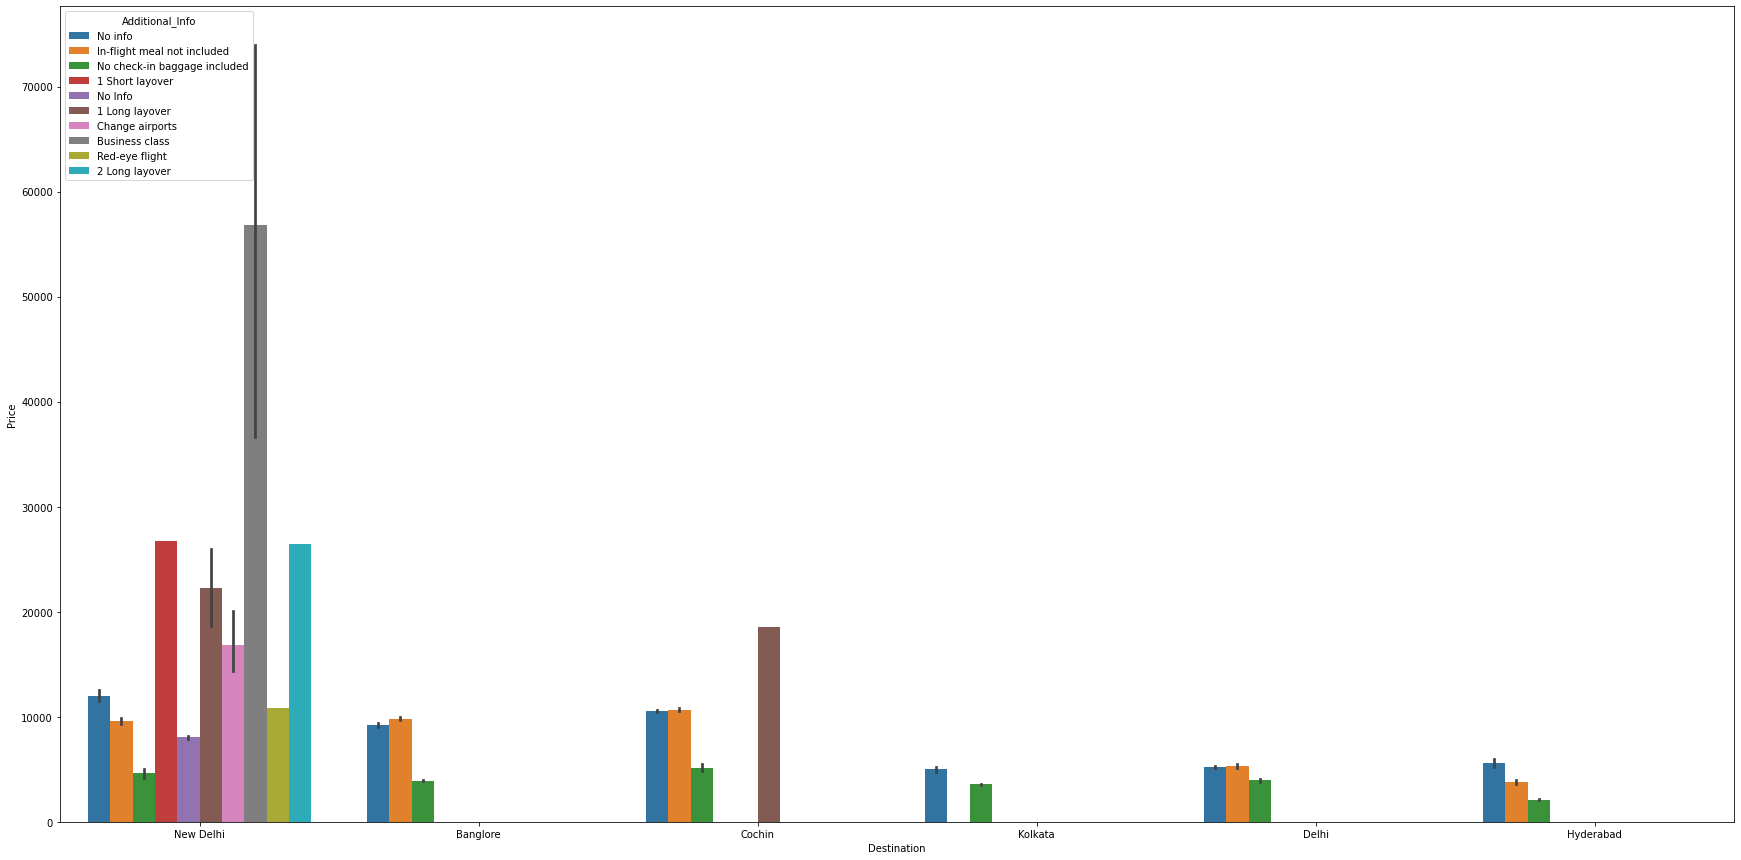

In [32]:
plt.figure(figsize=(30,15))
sns.barplot(x="Destination" , y = "Price", hue='Additional_Info',data=ftr)
plt.show()

# Data Engineering(Train data):

In [33]:
ftr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [34]:
# Creating 3 different columns for day, month and year data
ftr['year'] = pd.DatetimeIndex(ftr['Date_of_Journey']).year 
ftr['month'] = pd.DatetimeIndex(ftr['Date_of_Journey']).month 
ftr['day'] = pd.DatetimeIndex(ftr['Date_of_Journey']).day

In [35]:
# Now the Date_of_Journey column is not needed
ftr.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [36]:
# Creating 2 different columns for hour and minutes data
ftr["Dep_hour"] = pd.to_datetime(ftr["Dep_Time"]).dt.hour
ftr["Dep_min"] = pd.to_datetime(ftr["Dep_Time"]).dt.minute
ftr.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50


In [37]:
# Dropping the Dep_Time data as it's not needed
ftr.drop(["Dep_Time"],axis =1,inplace = True)

In [38]:
duration = list(ftr["Duration"])# Assigning Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:           # if there 'h' present
            duration[i] = duration[i].strip() + " 0m"   # then Add 0 as minute
        else:
            duration[i] = "0h " + duration[i]           # Add 0 as hour

duration_hours = []  # the new duration_hours column after conversion
duration_mins = []   # the new duration_minutes column after conversion   
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [39]:
#Adding the duration columns in the train dataset
ftr["Duration_hours"] = duration_hours
ftr["Duration_mins"] = duration_mins

In [40]:
#  As the Extraction is done, now we can drop the old Duration column
ftr.drop(["Duration"],axis=1,inplace=True)
ftr.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,2019,3,24,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,2019,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,2019,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,2019,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,2019,1,3,16,50,4,45


In [41]:
fte.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:
fte['year'] = pd.DatetimeIndex(fte['Date_of_Journey']).year 
fte['month'] = pd.DatetimeIndex(fte['Date_of_Journey']).month 
fte['day'] = pd.DatetimeIndex(fte['Date_of_Journey']).day

In [43]:
# Now the Date_of_Journey column is not needed
fte.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [44]:
# As we can see now the test dataset is having 3 different columns for day, month and year
fte.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


In [45]:
# Creating 2 different columns for hour and minutes data
fte["Dep_hour"] = pd.to_datetime(fte["Dep_Time"]).dt.hour
fte["Dep_min"] = pd.to_datetime(fte["Dep_Time"]).dt.minute

In [46]:
# Dropping the Dep_Time data as it's not needed
fte.drop(["Dep_Time"],axis = 1,inplace = True)

In [47]:
# As we can see now the test dataset is having 2 more different columns Dep_hour and Dep_min
fte.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,2019,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,2019,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24,23,55


In [48]:
# Creating 2 different columns for hour and minutes from Arrival_Time data
fte["Arrival_hour"]=pd.to_datetime(fte.Arrival_Time).dt.hour
fte["Arrival_min"] = pd.to_datetime(fte.Arrival_Time).dt.minute

In [49]:
# Dropping the Arival_Time data as it's already separated into hours and minutes in two different columns
fte.drop(["Arrival_Time"],axis = 1,inplace = True)

In [50]:
# As we can see now the test dataset is having 2 more different columns Arrival_hour ,Arrival_min
fte.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


In [51]:
duration = list(fte["Duration"])# Assigning Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:           # if there 'h' present
            duration[i] = duration[i].strip() + " 0m"   # then Add 0 as minute
        else:
            duration[i] = "0h " + duration[i]           # Add 0 as hour

duration_hours = []  # the new duration_hours column after conversion
duration_mins = []   # the new duration_minutes column after conversion   
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [52]:
# Adding the duration columns in the train dataset
fte["Duration_hours"] = duration_hours
fte["Duration_mins"] = duration_mins

In [53]:
# As the Extraction is done, now we can drop the old Duration column
fte.drop(["Duration"],axis=1,inplace=True)
fte.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,2019,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,2019,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2019,6,24,23,55,2,45,2,50


Concatenation of train and test.

In [54]:
fpp= pd.concat([ftr,fte],ignore_index=True)

In [55]:
fpp1=fpp.select_dtypes(include='object')

In [56]:
fpp.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897.0,2019,3,24,22,20,2,50,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662.0,2019,1,5,5,50,7,25,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882.0,2019,9,6,9,25,19,0,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218.0,2019,12,5,18,5,5,25,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302.0,2019,1,3,16,50,4,45,NaN,NaN


In [57]:
Airline = fpp[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [58]:
Airline = fpp[["Source"]]
Airline = pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [59]:
Airline = fpp[["Destination"]]
Airline = pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [60]:
Airline = ftr[["Total_Stops"]]
Airline = pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0


In [61]:
fpp.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897.0,2019,3,24,22,20,2,50,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662.0,2019,1,5,5,50,7,25,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882.0,2019,9,6,9,25,19,0,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218.0,2019,12,5,18,5,5,25,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302.0,2019,1,3,16,50,4,45,NaN,NaN


In [62]:
# Drop Alert: dropping Route and Additional_info columns
fpp.drop(["Route", "Additional_Info"],axis = 1,inplace = True)
fpp.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,non-stop,3897.0,2019,3,24,22,20,2,50,NaN,NaN
1,Air India,Kolkata,Banglore,13:15,2 stops,7662.0,2019,1,5,5,50,7,25,NaN,NaN
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2 stops,13882.0,2019,9,6,9,25,19,0,NaN,NaN
3,IndiGo,Kolkata,Banglore,23:30,1 stop,6218.0,2019,12,5,18,5,5,25,NaN,NaN
4,IndiGo,Banglore,New Delhi,21:35,1 stop,13302.0,2019,1,3,16,50,4,45,NaN,NaN


In [63]:
# # let's concat those prior encoded columns into test dataset
# fpp=pd.concat([fpp, Airline, Source, Destination], axis = 1)
# fpp.head()

In [64]:
# dropping those old not encoded columns
fpp.drop(["Airline", "Source", "Destination"],axis = 1, inplace = True)
fpp.head()

,Arrival_Time,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,01:10 22 Mar,non-stop,3897.0,2019,3,24,22,20,2,50,NaN,NaN
1,13:15,2 stops,7662.0,2019,1,5,5,50,7,25,NaN,NaN
2,04:25 10 Jun,2 stops,13882.0,2019,9,6,9,25,19,0,NaN,NaN
3,23:30,1 stop,6218.0,2019,12,5,18,5,5,25,NaN,NaN
4,21:35,1 stop,13302.0,2019,1,3,16,50,4,45,NaN,NaN


In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in fpp:
    fpp[i]=le.fit_transform(fpp[i])    

In [66]:
fpp.head()

,Arrival_Time,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,233,4,65,0,1,7,22,4,2,10,24,12
1,906,1,669,0,0,2,5,10,7,5,24,12
2,413,1,1537,0,5,3,9,5,19,0,24,12
3,1324,0,389,0,6,2,18,1,5,5,24,12
4,1237,0,1457,0,0,0,16,10,4,9,24,12


In [67]:
fpp.describe()

,Arrival_Time,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
count,13354.000000,13354.000000,13354.000000,13354.0,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,964.469822,1.451400,1022.383256,0.0,3.021716,3.808896,12.513254,4.901453,10.234087,5.668339,21.916879,10.582223
std,351.771032,1.804389,662.257908,0.0,1.832982,2.512432,5.736273,3.766477,8.471830,3.381086,5.221921,3.207965
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,721.000000,0.000000,369.250000,0.0,1.000000,2.000000,8.000000,1.000000,2.000000,3.000000,24.000000,12.000000
50%,1077.000000,0.000000,1054.000000,0.0,3.000000,3.000000,11.000000,5.000000,8.000000,6.000000,24.000000,12.000000
75%,1271.000000,4.000000,1638.000000,0.0,4.000000,6.000000,18.000000,8.000000,15.000000,9.000000,24.000000,12.000000
max,1343.000000,5.000000,1870.000000,0.0,6.000000,8.000000,23.000000,11.000000,43.000000,11.000000,24.000000,12.000000


In [68]:
fpp.drop(['year'],axis=1,inplace=True)

In [69]:
fpp.corr()

,Arrival_Time,Total_Stops,Price,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
Arrival_Time,1.000000,-0.077700,0.374441,0.001491,-0.015749,-0.008967,0.037233,0.046543,-0.084953,-0.429296,-0.475611
Total_Stops,-0.077700,1.000000,-0.454567,-0.064666,0.036293,0.045627,0.049532,-0.603615,0.180328,-0.019735,0.047888
Price,0.374441,-0.454567,1.000000,0.051848,-0.131951,0.011950,-0.025480,0.411871,-0.100352,-0.510610,-0.565696
month,0.001491,-0.064666,0.051848,1.000000,-0.144674,0.022587,-0.008965,0.065343,-0.027815,-0.003763,-0.017739
day,-0.015749,0.036293,-0.131951,-0.144674,1.000000,0.001657,-0.033480,-0.034891,-0.010777,0.027901,0.020115
Dep_hour,-0.008967,0.045627,0.011950,0.022587,0.001657,1.000000,-0.026674,-0.001653,-0.023553,-0.006239,0.006884
Dep_min,0.037233,0.049532,-0.025480,-0.008965,-0.033480,-0.026674,1.000000,-0.013349,0.092277,0.004655,-0.013269
Duration_hours,0.046543,-0.603615,0.411871,0.065343,-0.034891,-0.001653,-0.013349,1.000000,-0.119507,0.016078,-0.014114
Duration_mins,-0.084953,0.180328,-0.100352,-0.027815,-0.010777,-0.023553,0.092277,-0.119507,1.000000,-0.034523,0.034893
Arrival_hour,-0.429296,-0.019735,-0.510610,-0.003763,0.027901,-0.006239,0.004655,0.016078,-0.034523,1.000000,0.666798


<AxesSubplot:>

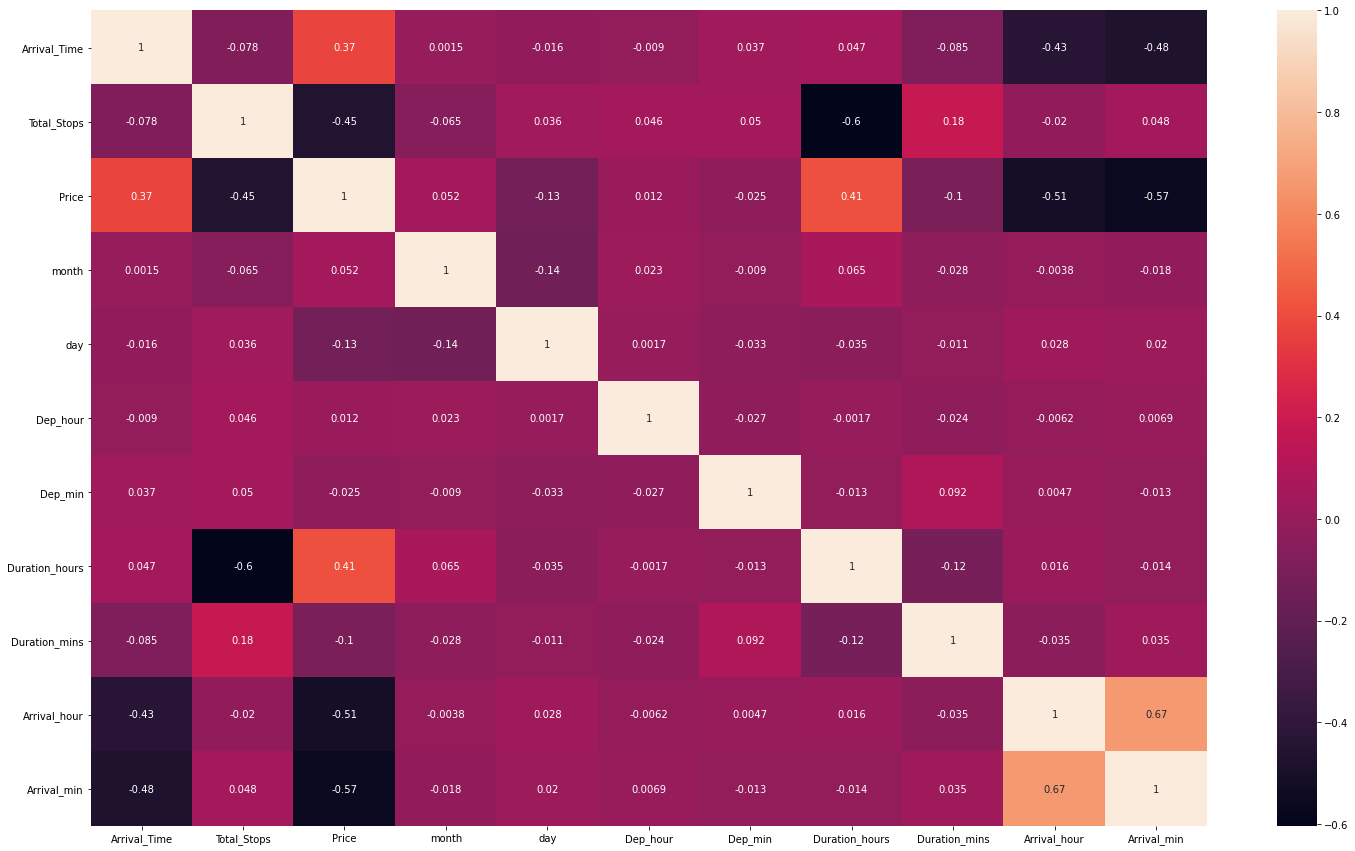

In [70]:
plt.figure(figsize=(25,15))
sns.heatmap(fpp.corr(),annot=True)

In [71]:
fpp.head()

,Arrival_Time,Total_Stops,Price,month,day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,233,4,65,1,7,22,4,2,10,24,12
1,906,1,669,0,2,5,10,7,5,24,12
2,413,1,1537,5,3,9,5,19,0,24,12
3,1324,0,389,6,2,18,1,5,5,24,12
4,1237,0,1457,0,0,16,10,4,9,24,12


# Outlier Detection.

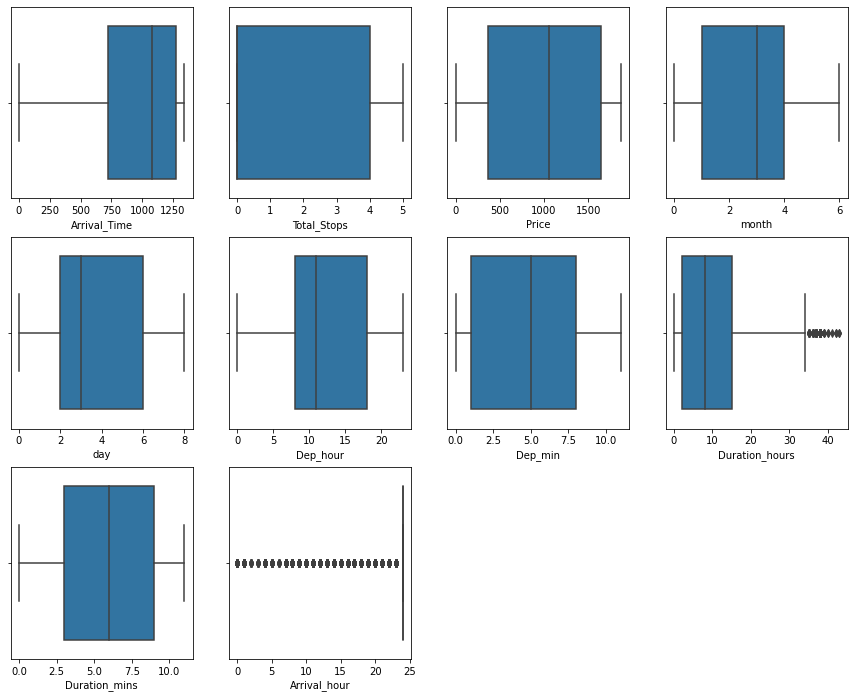

In [72]:
plt.figure(figsize=(15,12))
plot=1
for i in fpp:
    if plot<=10:
        plt.subplot(3,4,plot)
        sns.boxplot(fpp[i])
        plt.xlabel(i)
        plot=plot+1
plt.show();

# Removing OUtliers using zscore method.

In [73]:
from scipy.stats import zscore
z =np.abs(zscore(fpp))
print(z.shape)
fpp =fpp.loc[(z<3).all(axis=1)]
print(fpp.shape)

(13354, 11)
(12409, 11)


In [74]:
fpp.isna().sum()

Arrival_Time      0
Total_Stops       0
Price             0
month             0
day               0
Dep_hour          0
Dep_min           0
Duration_hours    0
Duration_mins     0
Arrival_hour      0
Arrival_min       0
dtype: int64

# Checking Skewness.

In [75]:
fpp.skew()

Arrival_Time     -0.672606
Total_Stops       0.599485
Price            -0.011061
month            -0.135853
day               0.147200
Dep_hour          0.109434
Dep_min           0.156307
Duration_hours    0.775733
Duration_mins    -0.105282
Arrival_hour     -3.114077
Arrival_min      -2.798885
dtype: float64

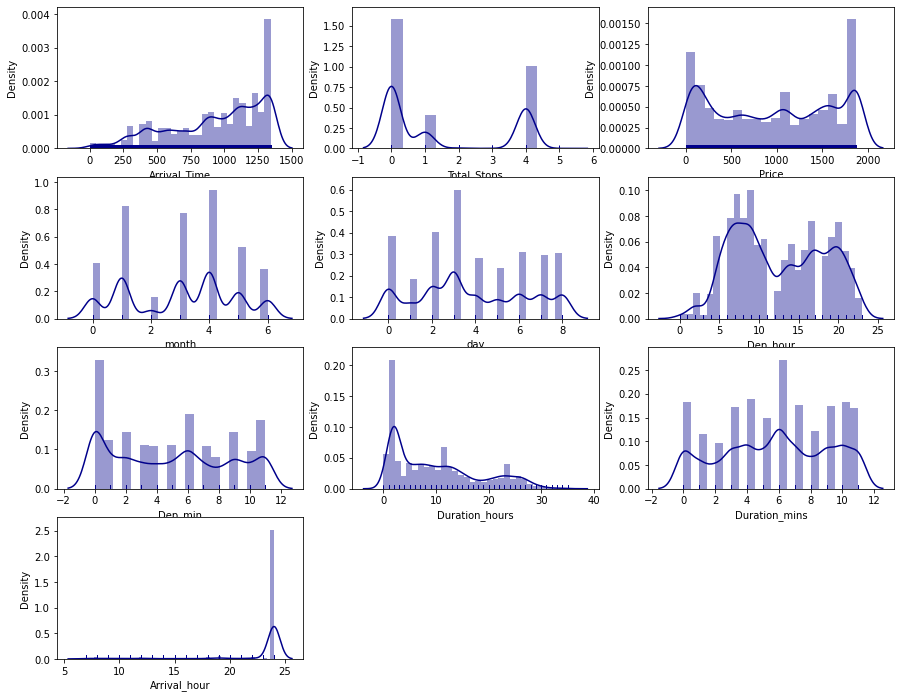

In [76]:
plt.figure(figsize=(15,12))
plot=1
for i in fpp:
    if plot<=10:
        plt.subplot(4,3,plot)
        sns.distplot(fpp[i],rug=True,color='Darkblue')
        plt.xlabel(i)
        plot=plot+1
plt.show();

# Dropping the target columns.

In [77]:
x=fpp.drop(['Price'],axis=1)
y=fpp[['Price']]

In [78]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_value=ss.fit_transform(x)

# Principle Component Analysis.

In [79]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [80]:
pca=PCA()
pca.fit_transform(scaled_value)

array([[-1.66696732, -2.21312983, -1.00677634, ...,  1.1980571 ,
        -0.0270259 , -0.0052269 ],
       [-0.32069011, -0.31089777, -0.24398205, ...,  0.0878827 ,
        -0.31717705,  0.05020322],
       [-1.0333939 ,  1.50253168,  0.52959489, ...,  1.44047455,
         0.64342575, -0.12654054],
       ...,
       [ 1.58598578, -2.01498856, -1.7719461 , ..., -0.43169799,
         0.55563847,  1.2034103 ],
       [ 3.39633861,  1.33027635,  0.6340525 , ...,  0.37335517,
        -0.2991514 , -1.605342  ],
       [ 3.45427403,  0.79420446,  0.37409915, ...,  0.68681436,
        -0.50666017, -1.50150253]])

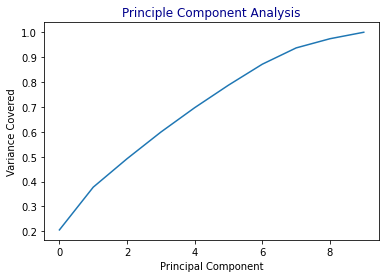

In [81]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title('Principle Component Analysis',color='darkblue')
plt.show()

# Model Creation

In [82]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [83]:
x_train, y_test ,x_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [84]:
def maxr2_score(clf,x,y):   
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    
    
    return final_r
        
        

max r2 score corresponding to 51 is 59.12447681246298
cross validation score -7.271194008839577
Standard Deviation 110.88298008182818
Training accuracy 56.6174910552709
Test Accuracy 57.923709346299205
MAE 347.0483653393916
MSE 176776.98408999003
RMSE 420.44855106182735




51

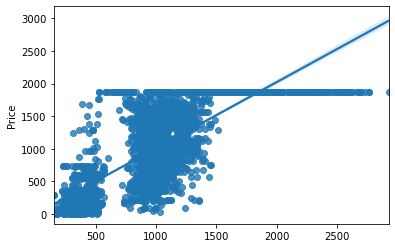

In [85]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 51 is 59.1244624063799
cross validation score -7.262424604339741
Standard Deviation 110.80416841586438
Training accuracy 56.6171757051823
Test Accuracy 57.91478908549206
MAE 347.17591492395724
MSE 176814.4611769263
RMSE 420.49311668198123




51

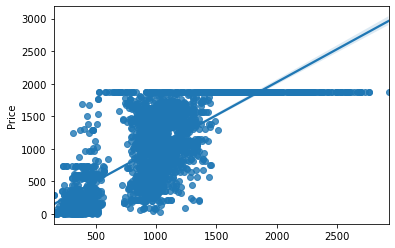

In [86]:
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 51 is 59.124472450829224
cross validation score -7.271030566208977
Standard Deviation 110.88212293193416
Training accuracy 56.6174910370969
Test Accuracy 57.92364009815103
MAE 347.0492674597591
MSE 176777.27502530295
RMSE 420.4488970437465




51

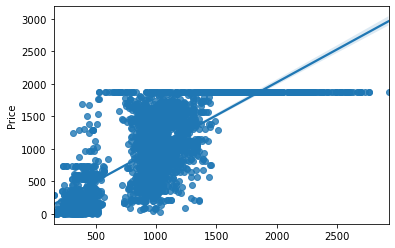

In [87]:
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 43 is 79.0754005531435
cross validation score -13.140333245342974
Standard Deviation 159.31469514274207
Training accuracy 97.04521947340089
Test Accuracy 77.12733096394399
MAE 180.72520816545796
MSE 96095.95778203061
RMSE 309.99348022503733




43

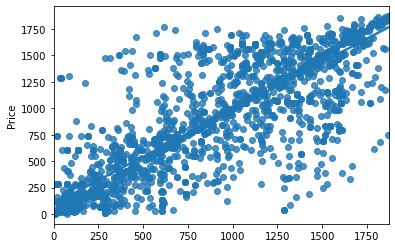

In [88]:
dt2=DecisionTreeRegressor()
maxr2_score(dt2,x,y)

max r2 score corresponding to 72 is 82.1145341264334
cross validation score 7.855803089113262
Standard Deviation 122.97863607768062
Training accuracy 86.89030571383418
Test Accuracy 79.3795892475799
MAE 187.97800161160356
MSE 86633.4452699436
RMSE 294.33559973259025




72

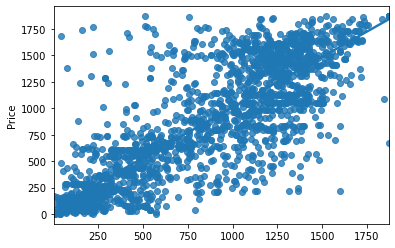

In [89]:
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

In [90]:
# svm=SVR()
# maxr2_score(svm,x,y)

max r2 score corresponding to 46 is 86.41113971852599
cross validation score 11.78778025815288
Standard Deviation 130.80663384258634
Training accuracy 96.01885252494826
Test Accuracy 85.07012219923828
MAE 153.42018522249083
MSE 62725.55706425166
RMSE 250.45070785336515




46

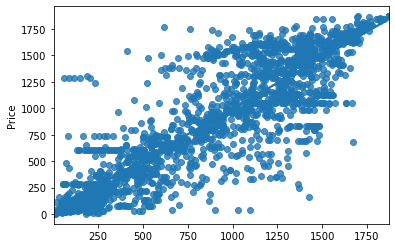

In [91]:
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 72 is 56.7414129846443
cross validation score -5.840811140206119
Standard Deviation 99.52741092530725
Training accuracy 55.19105797184998
Test Accuracy 56.41401484515494
MAE 364.8591235749233
MSE 183119.73048382057
RMSE 427.92491220285433




72

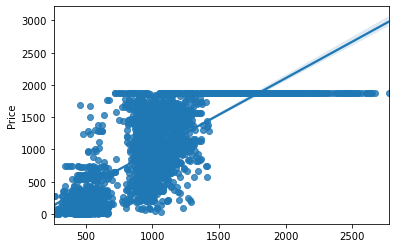

In [92]:
Adb=AdaBoostRegressor(base_estimator=lasso)
maxr2_score(Adb,x,y)

max r2 score corresponding to 53 is 82.49809117355574
cross validation score 3.593566620973983
Standard Deviation 137.27362905192697
Training accuracy 81.95908962707081
Test Accuracy 82.3295968436094
MAE 199.37454937777693
MSE 74239.44765830316
RMSE 272.4691682710232




53

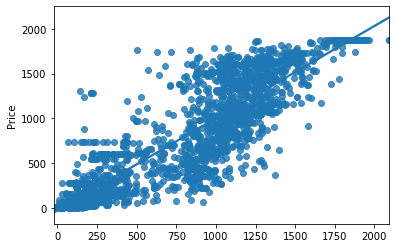

In [93]:
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=.20)
ridge=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1],'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
glf=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'alpha': 1, 'solver': 'auto'}

In [95]:
ridge1=Ridge(alpha=1,solver='svd')
ridge1.fit(x_train,y_train)
pred=ridge1.predict(x_test)
print('Training accuracy',ridge1.score(x_train,y_train)*100)
print('Test Accuracy',ridge1.score(x_test,y_test)*100)
print('\n')

print('Error:')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 score',r2_score(pred,y_test)*100)


Training accuracy 56.81930758885778
Test Accuracy 57.16686842347595


Error:
MAE 350.3753507306524
MSE 179554.58189929673
RMSE 423.73881330283723
R2 score 27.278374983253727


# Save the model.

In [96]:
import joblib
joblib.dump(ridge1,'ftr.pkl')

['ftr.pkl']

In [97]:
loaded_model=joblib.load('ftr.pkl')
prediction=loaded_model.predict(x_test)

In [98]:
prediction

array([[ 948.62110508],
       [1125.87478963],
       [ 826.89400048],
       ...,
       [1130.62296542],
       [ 419.42934799],
       [ 428.28823133]])